In [14]:
# Importing required libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

In [15]:
# Set the seed for reproducibility
np.random.seed(0)

In [16]:
# Constants for the dataset
N_SAMPLES = 800
FEATURE_1_MEAN = 2500
FEATURE_1_STD = 200
FEATURE_2_MEAN = 400
FEATURE_2_STD = 15
FEATURE_3_STD = 12

In [17]:
# Generate Feature_1 and ensure it's within the specified range
Feature_1 = np.random.normal(FEATURE_1_MEAN, FEATURE_1_STD, N_SAMPLES)
Feature_1 = np.clip(Feature_1, 2200, 2800)

# Generate Feature_2
Feature_2 = np.random.normal(FEATURE_2_MEAN, FEATURE_2_STD, N_SAMPLES)

In [18]:
# Generate Groups with roughly equal distribution
groups = ['A', 'B', 'C']
Group = np.random.choice(groups, N_SAMPLES, p=[1/3, 1/3, 1/3])

In [19]:
# Create a DataFrame
df = pd.DataFrame({
    'ID': [f'D{str(i).zfill(3)}' for i in range(1, N_SAMPLES + 1)],
    'Group': Group,
    'Feature_1': Feature_1,
    'Feature_2': Feature_2
})

In [20]:
# Define the function to calculate Feature_3 based on the group
def calculate_feature_3(row):
    if row['Group'] == 'A':
        return 3 * row['Feature_1'] - 5 * row['Feature_2']
    elif row['Group'] == 'B':
        return 2 * row['Feature_1']
    elif row['Group'] == 'C':
        return -row['Feature_1'] + row['Feature_2']

# Apply the function to calculate Feature_3 without noise
df['Feature_3_base'] = df.apply(calculate_feature_3, axis=1)

In [21]:
# Add normally distributed noise to Feature_3
df['Feature_3'] = df['Feature_3_base'] + np.random.normal(0, FEATURE_3_STD, N_SAMPLES)

# Drop the base Feature_3 as it's no longer needed
df.drop('Feature_3_base', axis=1, inplace=True)

In [22]:
# Adjust the DataFrame display to limit the floating point numbers to 2 significant figures
pd.options.display.float_format = '{:.2f}'.format

# Display the first few rows of the dataframe to verify the dataset
df.head()

,ID,Group,Feature_1,Feature_2,Feature_3
0,D001,B,2800.00,421.17,5618.68
1,D002,C,2580.03,411.79,-2157.64
2,D003,A,2695.75,399.14,6067.32
3,D004,A,2800.00,394.13,6417.53
4,D005,B,2800.00,414.11,5597.75


## Question 2

In [26]:
# 2a.
# For a normal distribution, we calculate the cumulative distribution function (CDF) for the value 3000
theoretical_count = N_SAMPLES * (1 - norm.cdf(3000, FEATURE_1_MEAN, FEATURE_1_STD))
print(f"The theoretical number of samples where Feature_1 is greater than 3000 is approximately {theoretical_count:.2f}. This is based on the properties of the normal distribution of Feature_1.")

The theoretical number of samples where Feature_1 is greater than 3000 is approximately 4.97. This is based on the properties of the normal distribution of Feature_1.


In [27]:
# 2b: Actual number of samples with Feature_1 > 3000
actual_count = sum(df['Feature_1'] > 3000)
print(f"The actual number of samples where Feature_1 is greater than 3000 is: {actual_count}.")

The actual number of samples where Feature_1 is greater than 3000 is: 0.


In [29]:
# 2c: Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group
grouped_stats = df.groupby('Group')['Feature_3'].agg(['mean', 'std']).reset_index()
print("The mean and standard deviation of Feature_3 within each group are:")
grouped_stats

The mean and standard deviation of Feature_3 within each group are:


,Group,mean,std
0,A,5443.81,529.38
1,B,4996.29,350.20
2,C,-2079.91,174.09


## Question 3

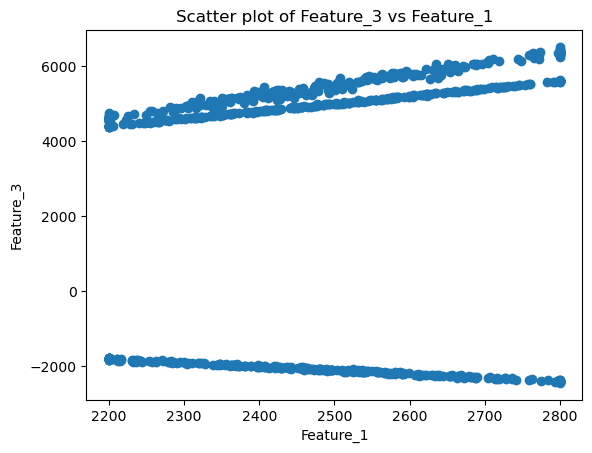

In [30]:
# Make a scatterplot of Feature_3 vs Feature_1
plt.scatter(df['Feature_1'], df['Feature_3'])
plt.title('Scatter plot of Feature_3 vs Feature_1')
plt.xlabel('Feature_1')
plt.ylabel('Feature_3')
plt.savefig('scatterplot_feature3_vs_feature1.png')  # Saves the scatter plot as an image file
plt.show()  

## Question 4

In [36]:
# Define a formatter function to apply 2 decimal places
formatter = lambda x: f'{x:.2f}'

# Apply the formatter to the DataFrame and then save to CSV
df.to_csv('fake_data.csv', float_format=formatter, index=False)

print("The DataFrame has been saved to 'fake_data.csv' with all floating-point numbers rounded to two decimal places.")


The DataFrame has been saved to 'fake_data.csv' with all floating-point numbers rounded to two decimal places.
